In [189]:
import numpy as np
import pandas as pd

In [190]:
df1 = pd.read_excel('/content/sn_compliance_control.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [191]:
df1.sample(5)

,Number,Name,Profile,Owner,Policy Statement,State,Status,Exempt,Weighting,Active,...,Key control,Owning group,Profile type,Profile type.1,Source,Tags,Type,Updated,Updated by,Updates
1104,CTRL0020533,Control remote access through a network access control.,Logitech,Amos Linnan,Control remote access through a network access control.,Monitor,Compliant,False,10.0,True,...,False,NaN,NaN,NaN,"3c81b176cb300200829cf865734c9c96,",NaN,Technical Security,2017-02-28 11:48:39,admin,0.0
1460,CTRL0020889,Protect remote access accounts with encryption.,Lexmark,Amos Linnan,Protect remote access accounts with encryption.,Monitor,Compliant,False,10.0,True,...,False,NaN,NaN,NaN,"3c81b176cb300200829cf865734c9c96,",NaN,Configuration,2017-02-28 11:48:42,admin,0.0
1191,CTRL0020620,Monitor and evaluate all remote access usage.,Adtran,Amos Linnan,Monitor and evaluate all remote access usage.,Monitor,Compliant,False,10.0,True,...,False,NaN,NaN,NaN,"3c81b176cb300200829cf865734c9c96,",NaN,Monitor and Evaluate Occurrences,2017-02-28 11:48:40,admin,0.0
643,CTRL0020072,Establish and maintain records management policies used to manage organizational records.,Sun Microsystems,Amos Linnan,Establish and maintain records management policies used to manage organizational records.,Monitor,Compliant,False,10.0,True,...,False,NaN,NaN,NaN,"3c81b176cb300200829cf865734c9c96,",NaN,Establish/Maintain Documentation,2017-02-28 11:41:34,admin,0.0
1168,CTRL0020597,Disallow remote users from copying files to remote devices.,Altiris,Amos Linnan,Disallow remote users from copying files to remote devices.,Monitor,Compliant,False,10.0,True,...,False,NaN,NaN,NaN,"3c81b176cb300200829cf865734c9c96,",NaN,Technical Security,2017-02-28 11:48:40,admin,0.0


In [192]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [193]:
pd.set_option('display.max_colwidth', -1)

df= df1[['Classification','Description']]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Classification,Description
0,Preventive,Establish and maintain identification mechanism termination procedures.
1,Detective,Review facility access lists.
2,Preventive,"Manage access to loading docks, unloading docks, and mail rooms."
3,Preventive,Establish and maintain a visitor access permissions policy.
4,Preventive,"Use locks with electronic authentication systems or cipher locks, as necessary."


In [194]:
df.sample(5)

,Classification,Description
685,Preventive,Establish and maintain a record classification scheme.
1229,Preventive,Implement two-factor authentication techniques.
946,Detective,Capture the records required by organizational compliance requirements.
536,Preventive,Perform risk assessments prior to approving change requests.
1440,Preventive,Control all methods of remote access and teleworking.


In [195]:
# renaming the cols
df.rename(columns={'Classification':'target','Description':'text'},inplace=True)
df.sample(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,target,text
232,Preventive,Establish and maintain a change control program.
598,Detective,Capture the records required by organizational compliance requirements.
681,Preventive,Establish and maintain a record classification scheme.
14,Preventive,"Escort visitors within the facility, as necessary."
1121,Preventive,Control all methods of remote access and teleworking.


In [196]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [197]:
df['target'] = encoder.fit_transform(df['target'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
df.head()

,target,text
0,1,Establish and maintain identification mechanism termination procedures.
1,0,Review facility access lists.
2,1,"Manage access to loading docks, unloading docks, and mail rooms."
3,1,Establish and maintain a visitor access permissions policy.
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary."


In [199]:
df.dropna(subset=['text'],axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [200]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [202]:
df.shape

(1489, 2)

In [203]:
# check for duplicate values
df.duplicated().sum()

1435

In [204]:
# remove duplicates
df = df.drop_duplicates()

In [205]:
df.duplicated().sum()

0

In [206]:
df.shape

(54, 2)

## 2.EDA

In [133]:
df.head()

,target,text
0,1,Establish and maintain identification mechanism termination procedures.
1,0,Review facility access lists.
2,1,"Manage access to loading docks, unloading docks, and mail rooms."
3,1,Establish and maintain a visitor access permissions policy.
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary."


In [134]:
df['target'].value_counts()

1    45
0    9 
Name: target, dtype: int64

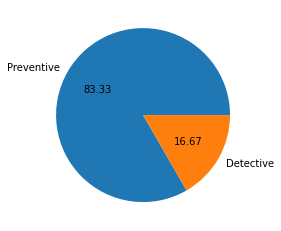

In [135]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Preventive','Detective'],autopct="%0.2f")
plt.show()

In [136]:
# Data is imbalanced

In [137]:
import nltk

In [138]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [140]:
df['num_characters'] = df['text'].apply(len)

In [141]:
df.head()

,target,text,num_characters
0,1,Establish and maintain identification mechanism termination procedures.,71
1,0,Review facility access lists.,29
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64
3,1,Establish and maintain a visitor access permissions policy.,59
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79


In [142]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [143]:
df.head()

,target,text,num_characters,num_words
0,1,Establish and maintain identification mechanism termination procedures.,71,8
1,0,Review facility access lists.,29,5
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13
3,1,Establish and maintain a visitor access permissions policy.,59,9
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13


In [144]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [145]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,Establish and maintain identification mechanism termination procedures.,71,8,1
1,0,Review facility access lists.,29,5,1
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13,1
3,1,Establish and maintain a visitor access permissions policy.,59,9,1
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13,1


In [146]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,54.000000,54.000000,54.0
mean,68.296296,10.296296,1.0
std,29.775024,4.302828,0.0
min,15.000000,3.000000,1.0
25%,50.250000,8.000000,1.0
50%,63.000000,9.000000,1.0
75%,77.750000,12.000000,1.0
max,176.000000,28.000000,1.0


In [147]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9.000000,9.000000,9.0
mean,62.444444,9.333333,1.0
std,24.197681,2.872281,0.0
min,29.000000,5.000000,1.0
25%,51.000000,8.000000,1.0
50%,55.000000,9.000000,1.0
75%,71.000000,10.000000,1.0
max,114.000000,15.000000,1.0


In [148]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,45.000000,45.000000,45.0
mean,69.466667,10.488889,1.0
std,30.871140,4.535828,0.0
min,15.000000,3.000000,1.0
25%,50.000000,8.000000,1.0
50%,63.000000,10.000000,1.0
75%,79.000000,12.000000,1.0
max,176.000000,28.000000,1.0


In [149]:
import seaborn as sns

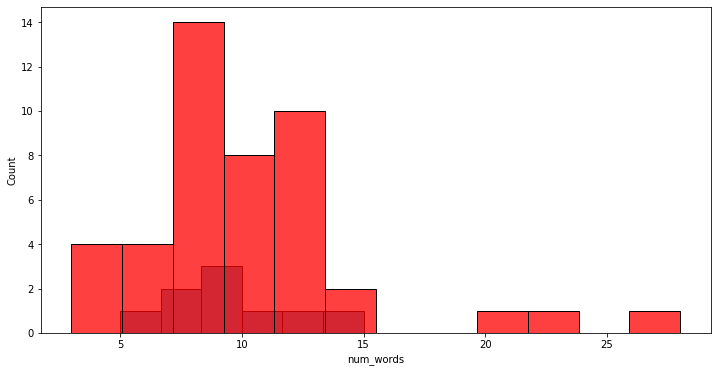

In [150]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

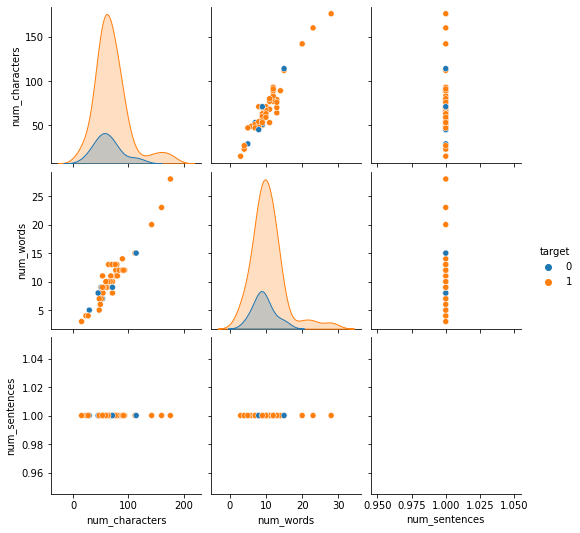

In [151]:
sns.pairplot(df,hue='target')

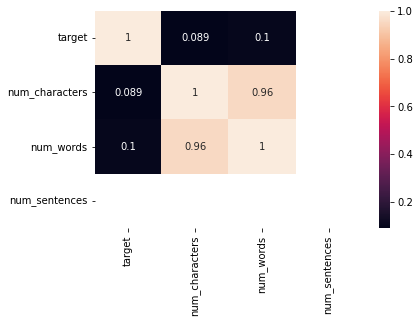

In [152]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [153]:
nltk.download("stopwords")
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [155]:
df['text'][10]

'Authorize visitors before granting entry to physical areas containing restricted data or restricted information.'

In [156]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [157]:
df['transformed_text'] = df['text'].apply(transform_text)

In [158]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Establish and maintain identification mechanism termination procedures.,71,8,1,establish maintain identif mechan termin procedur
1,0,Review facility access lists.,29,5,1,review facil access list
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13,1,manag access load dock unload dock mail room
3,1,Establish and maintain a visitor access permissions policy.,59,9,1,establish maintain visitor access permiss polici
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13,1,use lock electron authent system cipher lock necessari


In [159]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

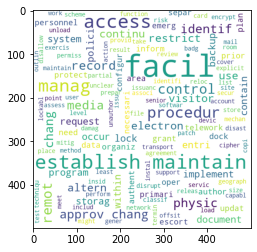

In [160]:
prevent_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(prevent_wc)
plt.show()

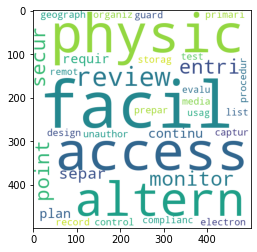

In [161]:
detect_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(detect_wc)
plt.show()

In [162]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Establish and maintain identification mechanism termination procedures.,71,8,1,establish maintain identif mechan termin procedur
1,0,Review facility access lists.,29,5,1,review facil access list
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13,1,manag access load dock unload dock mail room
3,1,Establish and maintain a visitor access permissions policy.,59,9,1,establish maintain visitor access permiss polici
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13,1,use lock electron authent system cipher lock necessari


In [163]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [164]:
len(spam_corpus)

306

In [165]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [166]:
len(ham_corpus)

55

In [167]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Establish and maintain identification mechanism termination procedures.,71,8,1,establish maintain identif mechan termin procedur
1,0,Review facility access lists.,29,5,1,review facil access list
2,1,"Manage access to loading docks, unloading docks, and mail rooms.",64,13,1,manag access load dock unload dock mail room
3,1,Establish and maintain a visitor access permissions policy.,59,9,1,establish maintain visitor access permiss polici
4,1,"Use locks with electronic authentication systems or cipher locks, as necessary.",79,13,1,use lock electron authent system cipher lock necessari


## 4. Model Building

In [168]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [169]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [170]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [171]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [172]:
X.shape

(54, 140)

In [173]:
y = df['target'].values

In [174]:
from imblearn.over_sampling import SMOTE
import collections
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_smote))

Original dataset shape Counter({1: 45, 0: 9})
Resample dataset shape Counter({1: 45, 0: 45})


In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=2)

In [177]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [178]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [179]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7777777777777778
[[8 0]
 [4 6]]
1.0


In [180]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.6666666666666666
[[8 0]
 [6 4]]
1.0


In [181]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8333333333333334
[[8 0]
 [3 7]]
1.0


In [182]:
# tfidf --> MNB

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [184]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [185]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [186]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [187]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8333333333333334, 1.0)

In [188]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8333333333333334
Precision -  1.0
For  KN
Accuracy -  0.5555555555555556
Precision -  1.0
For  NB
Accuracy -  0.6666666666666666
Precision -  1.0
For  DT
Accuracy -  0.7777777777777778
Precision -  1.0
For  LR
Accuracy -  0.5555555555555556
Precision -  0.6
For  RF
Accuracy -  0.8333333333333334
Precision -  1.0
For  AdaBoost
Accuracy -  0.8888888888888888
Precision -  1.0
For  BgC
Accuracy -  0.7777777777777778
Precision -  1.0
For  ETC
Accuracy -  0.8333333333333334
Precision -  1.0
For  GBDT
Accuracy -  0.7777777777777778
Precision -  1.0
For  xgb
Accuracy -  0.7222222222222222
Precision -  0.7272727272727273


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.818182,0.818182
2,NB,0.818182,0.818182
3,DT,0.818182,0.818182
4,LR,0.818182,0.818182
5,RF,0.818182,0.818182
6,AdaBoost,0.818182,0.818182
7,BgC,0.818182,0.818182
8,ETC,0.818182,0.818182
9,GBDT,0.818182,0.818182
10,xgb,0.818182,0.818182


In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [75]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.818182
1,NB,Accuracy,0.818182
2,DT,Accuracy,0.818182
3,LR,Accuracy,0.818182
4,RF,Accuracy,0.818182
5,AdaBoost,Accuracy,0.818182
6,BgC,Accuracy,0.818182
7,ETC,Accuracy,0.818182
8,GBDT,Accuracy,0.818182
9,xgb,Accuracy,0.818182


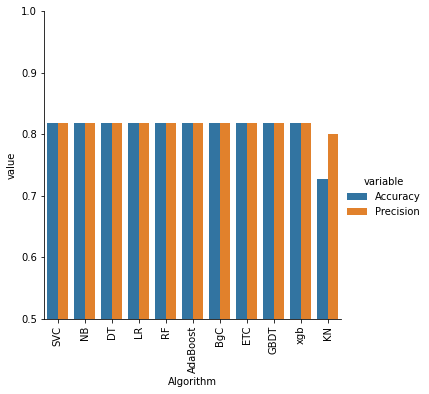

In [76]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [80]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [81]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [83]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182
1,NB,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182
2,DT,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182
3,LR,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182
4,RF,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182
5,AdaBoost,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182
6,BgC,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182
7,ETC,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182
8,GBDT,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182
9,xgb,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182


In [84]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [85]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [86]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [87]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8181818181818182
Precision 0.8181818181818182


In [88]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [89]:
from sklearn.ensemble import StackingClassifier

In [90]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [91]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9090909090909091
Precision 0.9


In [207]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))